### Data Mining and Machine Learning
### Classification using Support Vector Machine
#### Datasets: Diabetes, Landsat, Shuttle
#### Edgar Acuna 
#### April 2021

In [76]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

### Example 1. Linear SVM applied to the prediction of  final grade in a class bases on examens E1 and E2

In [77]:
df=pd.read_csv("http://academic.uprm.edu/eacuna/eje1dis.csv")
#df=pd.read_csv("c://PW-PR/eje1dis.csv")

In [78]:
#Normalizibg the predictor matrix
y=df['Nota']
X=df.iloc[:,0:2]
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
y2=df['pass']
y1=y2.to_numpy()
X1=X.to_numpy()
scaler = StandardScaler()
scaler.fit(X1)
X1= scaler.transform(X1)

#### Calculating the percentage of accuracy

In [21]:
#Applying a linear SVM classifier and calculating the percentage of accuracy
lin_clf = svm.LinearSVC()
lin_clf.fit(X1, y) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [22]:
#The confusion matrix
pred=lin_clf.predict(X1)
print(confusion_matrix(y,pred))

[[ 8  0]
 [ 0 24]]


In [23]:
#Calculating the number of errors
error=(y!=pred).sum()
print ("This is the number  of errors=", error)

This is the number  of errors= 0


In [24]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           f       1.00      1.00      1.00         8
           p       1.00      1.00      1.00        24

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



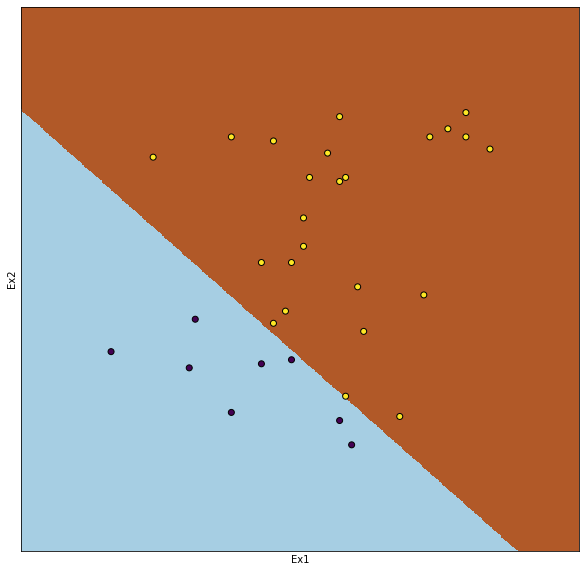

In [25]:
#Visualizing the decision Boundary
from matplotlib.colors import ListedColormap
#creando una columna "pass" numerica para representar las clases
#lb_make = LabelEncoder()
#df["pass"] = lb_make.fit_transform(df["Nota"])
#y2=df['pass']
#y1=y2.as_matrix()
#X1=X.as_matrix()
#scaler = StandardScaler()
#scaler.fit(X1)
#StandardScaler(copy=True, with_mean=True, with_std=True)
#X1= scaler.transform(X1)
lin_clf = svm.LinearSVC()
lin_clf.fit(X1, y1) 
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.01)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.01)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=lin_clf.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y1, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Applying a nonlinear SVM to the same dataset

In [26]:
clf = svm.SVC()
clf.fit(X1, y) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
clf.support_vectors_

array([[-1.37429956, -0.56638465],
       [-2.31141707, -0.87228016],
       [-0.30330812, -0.94875403],
       [ 0.2321876 , -1.52230811],
       [-0.63799295, -0.98699097],
       [-0.97267777, -1.44583423],
       [ 0.36606153, -1.75172974],
       [ 1.63786386,  1.38369921],
       [ 1.90561172,  1.03956676],
       [ 0.2321876 ,  1.34546227],
       [-1.84285831,  0.96309288],
       [-0.63799295, -0.03106751],
       [ 0.29912456, -1.29288648],
       [ 0.90155725, -1.48407117],
       [-0.50411902, -0.60462159],
       [-0.37024509, -0.48991077],
       [ 0.49993546, -0.68109546]])

In [28]:
clf.n_support_

array([ 7, 10])

The classifiers uses 7 support vector from class "F" and 10 from class "P"

In [29]:
#Calculando las predicciones
pred=clf.predict(X1)
print(pred)
#print(confusion_matrix(y,pred))

['p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p' 'p'
 'p' 'p' 'p' 'p' 'p' 'p' 'f' 'f' 'p' 'f' 'f' 'f' 'f' 'f']


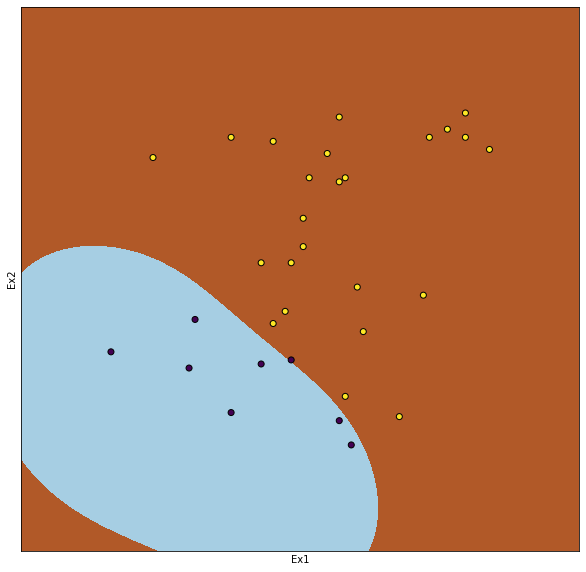

In [30]:
#Visualizing the decision Boundary
from matplotlib.colors import ListedColormap
#creando una columna "pass" numerica para representar las clases
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
y2=df['pass']
y1=y2.to_numpy()
X1=X.to_numpy()
scaler= StandardScaler()
scaler.fit(X1)
StandardScaler(copy=True, with_mean=True, with_std=True)
X1= scaler.transform(X1)
clf = svm.SVC()
clf.fit(X1, y1) 
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.001)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.001)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=clf.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y1, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Example 2. Nonlinear  SVM applied to Diabetes

In [55]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
print(data.shape)
data.head()

(768, 9)


preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      2
1     1    85    66    29     0  26.6  0.351   31      1
2     8   183    64     0     0  23.3  0.672   32      2
3     1    89    66    23    94  28.1  0.167   21      1
4     0   137    40    35   168  43.1  2.288   33      2

In [56]:
y=data['class']
X=data.iloc[:,0:8]
lb_make = LabelEncoder()
data["class"] = lb_make.fit_transform(data["class"])
y2=data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y)
y1=y.to_numpy()
X1=X.to_numpy()
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
clf=svm.SVC()
clf.fit(X, y2) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
clf.support_vectors_

array([[5.00e+00, 1.16e+02, 7.40e+01, ..., 2.56e+01, 2.01e-01, 3.00e+01],
       [1.00e+01, 1.15e+02, 0.00e+00, ..., 3.53e+01, 1.34e-01, 2.90e+01],
       [4.00e+00, 1.10e+02, 9.20e+01, ..., 3.76e+01, 1.91e-01, 3.00e+01],
       ...,
       [0.00e+00, 1.23e+02, 7.20e+01, ..., 3.63e+01, 2.58e-01, 5.20e+01],
       [9.00e+00, 1.70e+02, 7.40e+01, ..., 4.40e+01, 4.03e-01, 4.30e+01],
       [1.00e+00, 1.26e+02, 6.00e+01, ..., 3.01e+01, 3.49e-01, 4.70e+01]])

In [59]:
clf.n_support_

array([230, 228])

#### Accuracy using resubstitution

In [60]:
#Accuracy using resubstitution
clf.score(X,y2)

0.7682291666666666

#### Accuracy using cross validation

In [61]:
#Accuracy using cross validation
#y1=y.as_matrix()
X1=X.to_numpy()
scaler = StandardScaler()
scaler.fit(X1)
#StandardScaler(copy=True, with_mean=True, with_std=True)
X1= scaler.transform(X1)
clf=svm.SVC()
clf.fit(X1, y2) 
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X1, y2, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())    

The accuracy estimated by CV is: 0.7603896103896104


In [62]:
#accuracy using train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
scaler.fit(X_train)
#StandardScaler(copy=True, with_mean=True, with_std=True)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)
clf=svm.SVC()
clf.fit(X_train, y_train) 
pred=clf.predict(X_test)

In [63]:
print (classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       119
           1       0.75      0.49      0.60        73

    accuracy                           0.74       192
   macro avg       0.75      0.70      0.70       192
weighted avg       0.75      0.74      0.73       192



### Example 3. Linear SVM applied to Landsat 

In [64]:
#Loading the Landsat dataset
url='http://academic.uprm.edu/eacuna/landsat.txt'
data = pd.read_csv(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]
X=data.iloc[:,0:36]
#y1=y.as_matrix()
#X1=X.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
#Accuracy estimation using the "holdout" method 
X_train, X_test, y_train, y_test = train_test_split(X, y)
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [66]:
pred=lin_clf.predict(X_test)
print ((pred==y_test).mean())
print(confusion_matrix(y_test, pred))

0.4382326420198377
[[246   0   0  27   0   0]
 [  1 110   0  15   1   0]
 [  0   0   0 238   0   0]
 [  0   0   0 101   0   1]
 [  1   2   0 104  10   7]
 [  0   0   0 226   0  19]]


In [67]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.99      0.90      0.94       273
           2       0.98      0.87      0.92       127
           3       0.00      0.00      0.00       238
           4       0.14      0.99      0.25       102
           5       0.91      0.08      0.15       124
           6       0.70      0.08      0.14       245

    accuracy                           0.44      1109
   macro avg       0.62      0.49      0.40      1109
weighted avg       0.63      0.44      0.41      1109



### Example 4. Linear SVM applied to Shuttle

In [68]:
url = "https://academic.uprm.edu/eacuna/shuttle.trn"
data = pd.read_csv(url, header=None,delim_whitespace=True)

In [69]:
y=data.iloc[:,9]
X=data.iloc[:,0:9]
#y1=y.as_matrix()
#X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
#Accuracy estimacion using the  "holdout" method 
X_train, X_test, y_train, y_test = train_test_split(X, y)
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train) 

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [71]:
pred=lin_clf.predict(X_test)
print(confusion_matrix(y_test, pred))

[[8324    1    7   70    0    0  103]
 [   3    0    0    0    0    0    6]
 [  10    0    9    5    0    0   15]
 [ 690    0    0  399    0    0  620]
 [   3    1    0    4  408    0  195]
 [   1    0    0    0    0    0    0]
 [   0    0    1    0    0    0    0]]


In [72]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.92      0.98      0.95      8505
           2       0.00      0.00      0.00         9
           3       0.53      0.23      0.32        39
           4       0.83      0.23      0.36      1709
           5       1.00      0.67      0.80       611
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1

    accuracy                           0.84     10875
   macro avg       0.47      0.30      0.35     10875
weighted avg       0.91      0.84      0.85     10875



In [73]:
clf1 = svm.SVC(decision_function_shape='ovo')
clf1.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [74]:
pred=clf1.predict(X_test)
print(confusion_matrix(y_test, pred))

[[8444    1    4   55    1    0    0]
 [   3    1    0    2    3    0    0]
 [   7    0   29    0    3    0    0]
 [ 136    1    0 1572    0    0    0]
 [  11    0    0    0  600    0    0]
 [   0    0    0    0    1    0    0]
 [   1    0    0    0    0    0    0]]


In [75]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.98      0.99      0.99      8505
           2       0.33      0.11      0.17         9
           3       0.88      0.74      0.81        39
           4       0.97      0.92      0.94      1709
           5       0.99      0.98      0.98       611
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1

    accuracy                           0.98     10875
   macro avg       0.59      0.54      0.56     10875
weighted avg       0.98      0.98      0.98     10875

